# Word Count on TextFile using  `PySpark`
1. Read in a text file
* Count the number of separate lines
* Count number of xters per line
* Sum up all xters - i.e. find total number of xters in the textfile
* Count number of separate words in the text

In [102]:
import re
from operator import add
import matplotlib.pyplot as plt

% matplotlib inline

# Spark context running locally
sc.master

u'local[*]'

In [2]:
file_in = sc.textFile('words_to_count.txt')

In [3]:
# Count lines
print('Number of lines in file : {}'.format(file_in.count()))

Number of lines in file : 4652


In [15]:
# Find length of each line and display results of random 15 lines
file_in.map(lambda s: len(s)).takeSample(True,15)


[65, 23, 14, 34, 76, 2, 18, 18, 65, 348, 18, 6, 18, 6, 6]

In [16]:
# Find length of each line and reduce or SUM all the lengths
xters = file_in.map(lambda s: len(s)).reduce(add)
print('Total xters across ALL lines: {:,}'.format(xters))

Total xters across ALL lines: 266,198


In [93]:
# Get words from the input file, split, convert to lowercase and strip empty spaces.
words = file_in.flatMap(lambda line: re.split('\W+', line.lower().strip()))
words.collect()


[u'www',
 u'it',
 u'ebooks',
 u'info',
 u'spark',
 u'for',
 u'python',
 u'developers',
 u'a',
 u'concise',
 u'guide',
 u'to',
 u'implementing',
 u'spark',
 u'big',
 u'data',
 u'analytics',
 u'for',
 u'python',
 u'developers',
 u'and',
 u'building',
 u'a',
 u'real',
 u'time',
 u'and',
 u'insightful',
 u'trend',
 u'tracker',
 u'data',
 u'intensive',
 u'app',
 u'amit',
 u'nandi',
 u'birmingham',
 u'mumbai',
 u'www',
 u'it',
 u'ebooks',
 u'info',
 u'spark',
 u'for',
 u'python',
 u'developers',
 u'copyright',
 u'2015',
 u'packt',
 u'publishing',
 u'all',
 u'rights',
 u'reserved',
 u'no',
 u'part',
 u'of',
 u'this',
 u'book',
 u'may',
 u'be',
 u'reproduced',
 u'stored',
 u'in',
 u'a',
 u'retrieval',
 u'system',
 u'or',
 u'transmitted',
 u'in',
 u'any',
 u'form',
 u'or',
 u'by',
 u'any',
 u'means',
 u'without',
 u'the',
 u'prior',
 u'written',
 u'permission',
 u'of',
 u'the',
 u'publisher',
 u'except',
 u'in',
 u'the',
 u'case',
 u'of',
 u'brief',
 u'quotations',
 u'embedded',
 u'in',
 u'crit

## `MapReduce` action
> `map()` and `reduce()`

In [126]:
# Words with more than certain N xters
words = file_in.flatMap(lambda line: re.split('\W+', line.lower().strip()))
words = words.filter(lambda x: len(x) > 5)
words = words.map(lambda w: (w,1))
words = words.reduceByKey(add)

words = words.map(lambda x: (x[1], x[0])).sortByKey(False).take(25)
words

[(208, u'ebooks'),
 (172, u'python'),
 (169, u'streaming'),
 (132, u'chapter'),
 (125, u'learning'),
 (121, u'twitter'),
 (102, u'mongodb'),
 (98, u'machine'),
 (97, u'following'),
 (96, u'processing'),
 (93, u'import'),
 (82, u'tweets'),
 (78, u'architecture'),
 (75, u'apache'),
 (70, u'environment'),
 (69, u'information'),
 (65, u'create'),
 (62, u'pyspark'),
 (58, u'cluster'),
 (56, u'tweet_text'),
 (55, u'dataframe'),
 (52, u'distributed'),
 (52, u'github'),
 (51, u'meetup'),
 (51, u'created_at')]

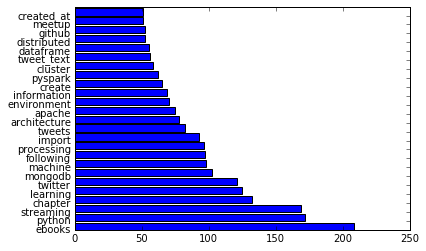

In [130]:
def histogramx(words):
    count = map(lambda x: x[0], words)
    word = map(lambda x: x[1], words)
    plt.barh(range(len(count)), count, color = 'blue')
    plt.yticks(range(len(count)), word)
    
histogramx(words)

In [131]:
import sys
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
from __future__ import print_function


def getSqlContextInstance(sparkContext):
    if ('sqlContextSingletonInstance' not in globals()):
        globals()['sqlContextSingletonInstance'] = SQLContext(sparkContext)
    return globals()['sqlContextSingletonInstance']


if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: uberstats <file>", file=sys.stderr)
        exit(-1)
        
    sc = SparkContext(appName="UberStats")
    df = getSqlContextInstance(sc).read.format('com.databricks.spark.csv') \
                    .options(header='true', inferschema='true') \
                    .load(sys.argv[1])
    df.register


In [ ]:
" SPARK_HOME//bin/; SPARK_HOME//conf;"
